In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('Housing.csv')

In [3]:
data=data.loc[:,['area','price']]
data.head()

,area,price
0,7420,13300000
1,8960,12250000
2,9960,12250000
3,7500,12215000
4,7420,11410000


In [4]:
data['area']/=10**3
data['price']/=10**6
data.rename(columns={'area':'area in 1.000','price':'price in 1.000.000'},inplace=True)
data.head()

,area in 1.000,price in 1.000.000
0,7.42,13.300
1,8.96,12.250
2,9.96,12.250
3,7.50,12.215
4,7.42,11.410


In [5]:
data.shape

(545, 2)

In [6]:
x=data['area in 1.000']
y=data['price in 1.000.000']

Text(0.5, 1.0, 'distribution of area in 1.000')

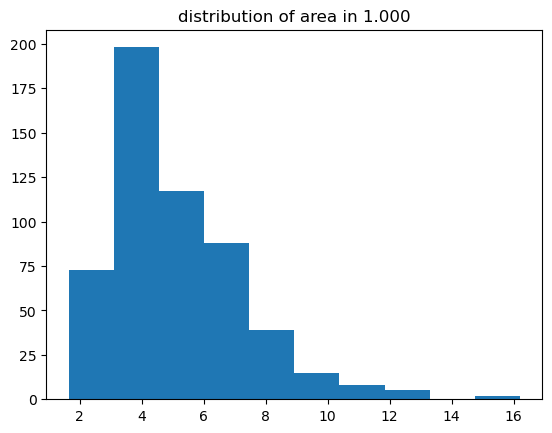

In [7]:
plt.hist(x)
plt.title('distribution of area in 1.000')

Text(0.5, 1.0, 'distribution of price in $1.000.000')

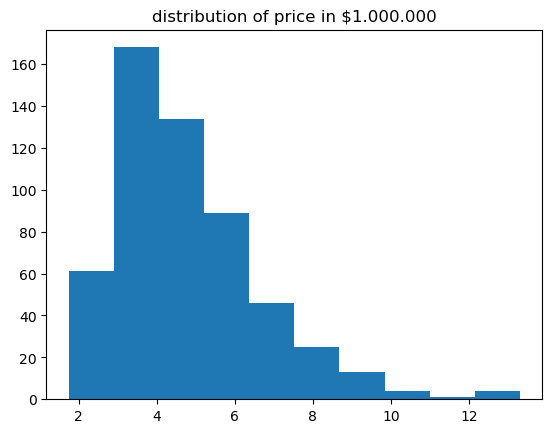

In [8]:
plt.hist(y)
plt.title('distribution of price in $1.000.000')

In [9]:
def get_plot(x,y,y_pred=None,reg=False):
    plt.scatter(x,y)
    plt.xlabel('area in 1.000')
    plt.ylabel('price in $1.000.000')
    if reg:
        plt.plot(x,y_pred,color='red')
    plt.title('housing')

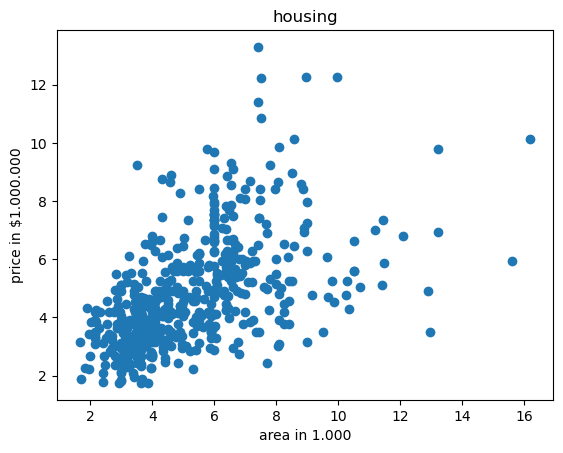

In [10]:
get_plot(x,y)

In [11]:
x=np.array(x)
y=np.array(y)

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [13]:
x_train.shape,x_test.shape

((381,), (164,))

### Model Prediction
$$ f_{w,b}(x) = wx + b\tag{1} $$ 
### Cost Function
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{2}$$
### Gradient descent
$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w := w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; & 
\newline & \rbrace\end{align*}$$

$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{4}
$$
$$
\frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} \tag{5}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value

In [14]:
class LinearRegression:
    def __init__(self):
        self.w=0
        self.b=0
    def compute_cost(self,x,y,w,b):
        m=x.shape[0]
        total_cost=0
        for i in range(m):
            f_wb_i=self.predict(x[i],w,b)
            cost_i=(f_wb_i-y[i])**2
            total_cost+=cost_i
        total_cost/=2*m
        return total_cost
    def compute_gradient(self,x,y,w,b):
        m=x.shape[0]
        dj_dw,dj_db=0,0
        for i in range(m):
            f_wb_i=self.predict(x[i],w,b)
            dj_dw_i=(f_wb_i-y[i])*x[i]
            dj_db_i=(f_wb_i-y[i])
            
            dj_dw+=dj_dw_i
            dj_db+=dj_db_i
        dj_dw/=m
        dj_db/=m
        return dj_dw,dj_db
    def gradient_descent(self,x,y,alpha=1e-2,num_iters=10**4):
        J,it=[],[]
        for i in range(num_iters):
            dj_dw,dj_db=self.compute_gradient(x,y,self.w,self.b)
            self.w=self.w-alpha*dj_dw
            self.b=self.b-alpha*dj_db
            cost=self.compute_cost(x,y,self.w,self.b)
            J.append(cost)
            it.append(i)
        plt.plot(it,J)
        plt.xlabel('number of iterations')
        plt.ylabel('cost')
        plt.title('learning curve')
    def predict(self,x,w,b):
        return w*x+b

In [15]:
def metrics(y_true,y_pred):
    y_mean=np.mean(y_true)
    mae=np.mean(abs(y_true-y_pred))
    mse=np.mean(np.square(y_true-y_pred))
    r_square=1-np.sum(np.square(y_true-y_pred))/np.sum(np.square(y_true-y_mean))
    print(f'mae = {mae}')
    print(f'mse = {mse}')
    print(f'r_square = {r_square}')

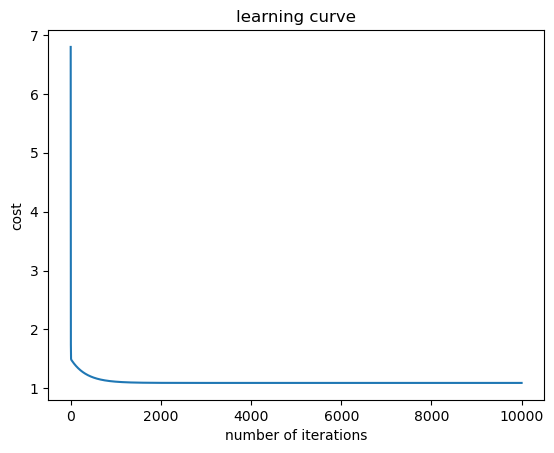

In [16]:
model=LinearRegression()
model.gradient_descent(x_train,y_train)
w,b=model.w,model.b
y_pred=model.predict(x_test,w,b)

mae = 1.387227856999623
mse = 3.1939898652759577
r_square = 0.2583140481098022


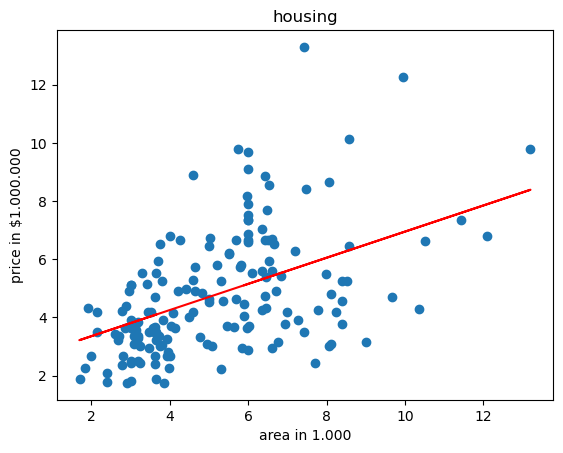

In [17]:
get_plot(x_test,y_test,y_pred=y_pred,reg=True)
metrics(y_test,y_pred)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae,mean_squared_error as mse,r2_score as r_score

In [19]:
lr=LinearRegression()
lr.fit(x_train.reshape(-1,1),y_train)
y_pred_lr=lr.predict(x_test.reshape(-1,1))

mae = 1.3872278956867645
mse = 3.1939899237576213
r_square = 0.2583140345295999


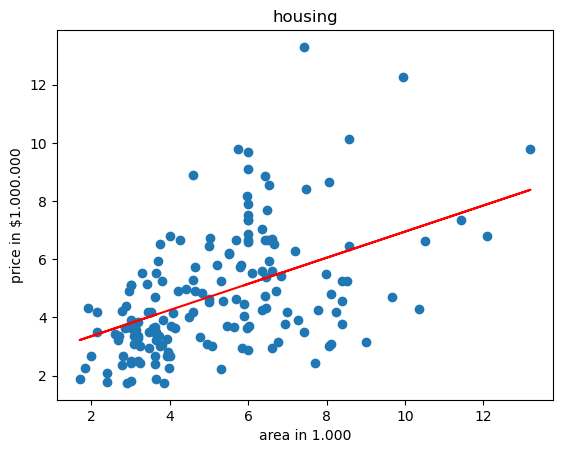

In [20]:
get_plot(x_test,y_test,y_pred=y_pred_lr,reg=True)
print(f'mae = {mae(y_test,y_pred_lr)}')
print(f'mse = {mse(y_test,y_pred_lr)}')
print(f'r_square = {r_score(y_test,y_pred_lr)}')